# First Jupyter Notebook: Tutorial With DataSpell

This is my first attempt at using Jupyter notebook.

My goal is to learn fast.ai, but one must walk before running. Best to begin with a Jupyter notebook. I found a tutorial that introduces both markdown and calculations.

I also downloaded DataSpell, an early access IDE for data science from JetBrains. I think their IntelliJ IDE for Java is the best tool on the market. I wanted to see if their new tool could provide a similar boost for my venture into data science.

Every language has a “Hello World”. Jupyter notebook is no different. Let’s create a cell:

In [14]:
print('Hello World!')

Hello World!


In [15]:
import time
time.sleep(3)

So far, so good.  Adding cells with markdown and code.  This is a nice environment.  DataSpell is making it fun.  Let's add a function:

In [16]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

say_hello('Michael')

'Hello, Michael!'

Jupyter notebook does a great job of keep code and documentation together.  It's a scientific revolution.  I think this is the best hope we have for maintaining that scientific ideal of making results public and easily reproducible by others.

I'll have to dig into [LaTeX](https://www.mathjax.org/) for math typesetting.  What does that look like?

Euler's identity: $$e^{i\pi} + 1 = 0$$<br>
$$\frac{arg 1}{arg 2}$$<br>
$$x^2$$<br>
$$e^{i\pi}$$<br>
$$A_i$$<br>
$$B_{ij}$$<br>
$$\sqrt[n]{arg}$$<br>

Here's a linear equation:

$$ \hat{Y} = \hat{\beta_0} + \sum_{j=1}^p \hat{\beta}_j X_j $$<br>

The tutorial has a bunch of markdown examples that aren't hard to understand.  No sense memorizing these.  I'll Google them when I need them.

# Level 1 heading
## Level 2 heading

Text is easy to format:

**bold**
_italic_

Lists are simple:

1. First element
2. Second element

* First bullet
* Second bullet

I created hyperlinks earlier.

It's easy to add code.  I hope to be able to add Python, R, and Kotlin someday soon.

`fun foo()`

Here's a code block:

```
fun bar() = "This could be some Kotlin code"
```

You can also tab in:

    fun baz():
        return 'A Python string'

What about images?  Let's add an image of a dog:

![Who dat?](../my_images/luna-napping.jpeg)

That's enough markdown.  This is about code.  Does DataSpell give me access to numpy?

In [17]:
import numpy as np

def square(q):
    return q*q

x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x, y))

7 squared is 49


Now I have numpy.   The tutorial tells me that there are kernels for over 100 languages, including Java, C, Fortran, R, and Kotlin.  There's an SoS kernel that provides multi-language support within a single notebook.  I'll stick to Python for now, but I can't wait to try out both R and Kotlin.

Enough about notebook mechanics.  What about a real analysis?

The tutorial problem uses a Fortune 500 data set.


In [18]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

df = pd.read_csv('../datasets/fortune500.csv')

df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [19]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [20]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
len(df)

25500

In [21]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Profit should be a float; instead, it's an object.  There must be non-integer values in that column.


In [24]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [25]:
set(df.profit[non_numeric_profits])

{'N.A.'}

There are values that are NA.  How many?

In [26]:
len(df.profit[non_numeric_profits])

369

That's a small fraction of total data set:

In [27]:
len(df.profit[non_numeric_profits])/len(df)

0.014470588235294117

The easiest thing to do is to discard the bad records.  How are they distributed?

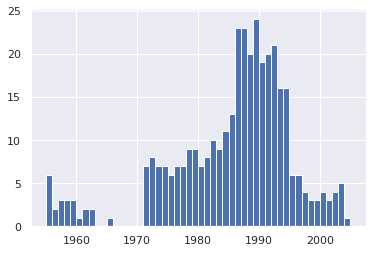

In [28]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955,2006))

The most invalid cases in a single year is fewer than 25.  Since there are 500 points per year, removing these values would account for less than 4% of the data for the worst years.  Let's remove these rows:

In [29]:
df = df.loc[-non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)
len(df)

25131

Let's check the types:

In [30]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

The final presentation notebook shouldn't leave all these exploratory cells, but I want to be able to see them.